Dec 22, 2021, 7:44 PM
Dec 22, 2021, 7:13 PM
Dec 22, 2021, 6:26 PM
Dec 22, 2021, 6:25 PM
Dec 22, 2021, 6:25 PM
Dec 22, 2021, 6:22 PM
Dec 22, 2021, 6:21 PM
Dec 22, 2021, 5:11 PM
Dec 22, 2021, 5:10 PM
Dec 22, 2021, 5:08 PM
Dec 22, 2021, 5:07 PM
Dec 22, 2021, 4:29 PM
Dec 22, 2021, 4:13 PM
Dec 22, 2021, 4:09 PM
Dec 22, 2021, 3:26 PM
Dec 21, 2021, 7:15 PM
Dec 21, 2021, 7:12 PM
Dec 21, 2021, 1:57 PM
Dec 21, 2021, 1:36 PM
Dec 21, 2021, 1:36 PM
Dec 21, 2021, 1:36 PM
Dec 21, 2021, 1:35 PM
Dec 21, 2021, 1:35 PM
Dec 21, 2021, 12:49 PM
Dec 21, 2021, 7:58 AM
Dec 21, 2021, 7:57 AM
Dec 21, 2021, 7:56 AM
Dec 21, 2021, 7:56 AM
Dec 21, 2021, 7:56 AM
Dec 21, 2021, 7:56 AM
Dec 21, 2021, 7:55 AM
Dec 21, 2021, 7:55 AM
Dec 21, 2021, 7:55 AM
Dec 21, 2021, 7:55 AM
Dec 21, 2021, 7:54 AM
Dec 21, 2021, 7:54 AM
Dec 14, 2021, 8:19 AM
Dec 14, 2021, 8:17 AM
Dec 14, 2021, 8:17 AM
Dec 14, 2021, 8:16 AM
Dec 14, 2021, 8:16 AM
Dec 14, 2021, 8:15 AM
Dec 14, 2021, 8:15 AM
Dec 14, 2021, 8:14 AM
Dec 14, 2021, 8:14 AM
Dec 14, 2

C:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


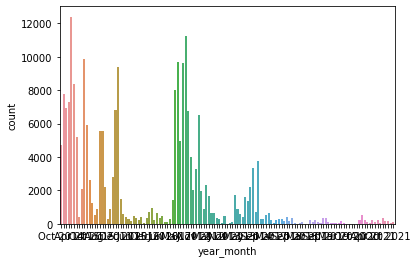

In [67]:
import codecs
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

directory_to_scan = 'C:/Users/Jakub/Documents/fb_messages/jackpot/messages/inbox/adelardrobna_crek8dtadw/'


dir_content = os.listdir(directory_to_scan)
messages = [entry for entry in dir_content if "message_" in entry]
message_number = messages[0]

clean_list = []
month = []
day = []
year = []
time = []
year_month = []

for messagefile in messages:
    message_number = messagefile
    file_address = directory_to_scan + message_number

    f = codecs.open(file_address, 'r', "utf-8")
    messages = f.read()
    source = BeautifulSoup(messages, features = "html.parser")
    divs = source.find_all("div", attrs={"_3-94 _2lem"})
    list_div = [x.get_text() for x in divs]

    #for div in divs:
    #    list_div.append((str(div.find_all("span", attrs={"_3-94 _2lem"})[0])[19:]))


    
    #ampm = []
    #list_df = [weekday, month, day, year, time, ampm]


    for div in list_div:
        print(div)
        clean_div = re.search("((\w+) \d+), (\d+), (\d+:\d+ \w+)" ,div)
        
        #weekday.append(clean_div.group(1))
        month.append(clean_div.group(2))
        day.append(clean_div.group(1))
        year.append(clean_div.group(3))
        time.append(clean_div.group(4))
        clean_list.append(clean_div.group(0))
        clean_div = re.search("(\w+ )\d+, (\d+)", div)
        a = clean_div.group(1)
        b = clean_div.group(2)
        c = a+b
        year_month.append(c)
        #ampm.append(clean_div.group(6))
    
# 
df = pd.DataFrame(list(zip(day, month, year, year_month, time)), columns = ["day", "month", "year", "year_month", "time"])


df_reverse = df.iloc[::-1]

plot_ = sns.countplot(df_reverse["year_month"])
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 6 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
#df.groupby(["time"]).count().plot(kind='bar')

#'Dec 25, 2021, 9:58 AM'
#regex až bude hotové = (\w+), (\w+? \d+), (\d+) \w+ (\d+:\d+)in the (\w+)
#regex_ted = (\w+'\w+), (\w+-\w+)! (\d+), (\d+) roundabouts (\d+:\d+)in the (\w+)

C:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


'\nfor ind, label in enumerate(adela.get_xticklabels()):\n    if ind % 4 == 0:  # every 10th label is kept\n        label.set_visible(True)\n    else:\n        label.set_visible(False)\n'

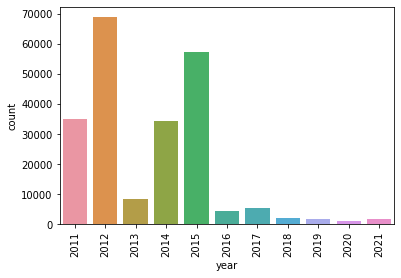

In [88]:
#plot_ = sns.countplot(df_reverse["year_month"])
df_sort_year = df.sort_values(by = "year", ascending = True)
adela = sns.countplot(df_sort_year["year"])
plt.xticks(rotation=90)
"""
for ind, label in enumerate(adela.get_xticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
"""


In [96]:
from datetime import datetime
teststr = "Dec 22, 2021, 5:07 PM"


datetime_object = datetime.strptime(teststr, "%b %d, %Y, %I:%M %p")
datetime_object

datetime.datetime(2021, 12, 22, 17, 7)